### Topic: Generative Models for Classification (Discriminant Analysis, Naïve Bayes)


                                                    
### INTRODUCTION (LDA and QDA)

Linear Discriminant Analysis (LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

#### LDA

LinearDiscriminantAnalysis can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes (in a precise sense discussed in the mathematics section below). The dimension of the output is necessarily less than the number of classes, so this is in general a rather strong dimensionality reduction, and only makes sense in a multiclass setting.

#### QDA
Quadratic Discriminant Analysis (QDA) is a generative model. QDA assumes that each class follow a Gaussian distribution. The class-specific prior is simply the proportion of data points that belong to the class. The class-specific mean vector is the average of the input variables that belong to the class

Also, when considering between LDA & QDA its important to know that LDA is a much less flexible classifier than QDA, and so has substantially lower variance. This can potentially lead to improved prediction performance.

#### Below we show an example of LDA and QDA using the weekly dataset

#### Describing the Data(WEEKLY DATASET )

This dataset represents the weekly percentage returns for the S&P 500 stock index between 1990 and 2010. It has 9 variables altogether where the Lags refer to the  percentage of return for the previous weeks,volume refers to the volume of shares traded, today is percentage return for this week and Direction is a factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

#### Objective:

The objective of this assignment is to model the data using Linear Discriminant Analysis, QDA and Naive Bayes Method for Classification.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
    
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


In [4]:
#importing the dataset

week=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 3/Program 1/Weekly.csv")
week

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [5]:
#Getty dummy variable for categorical variable

week = pd.get_dummies(week).drop('Direction_Down', axis=1)
week.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


### 1. Fit the LDA model using a training data period from 1990 to 2008. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [1]:
#Splitting into Training and Testing
b = week.index[week['Year'] < 2009]
week_train = week.iloc[b] #dataframe with years less than 2008
week_test  = week.drop(b) #dataframe with years more than 2009

y_test = pd.DataFrame(week_test['Direction_Up'])
y_train= pd.DataFrame(week_train['Direction_Up'])

X_test=week_test.drop(['Direction_Up'],axis=1)
X_train=week_train.drop(['Direction_Up'],axis=1)

NameError: name 'week' is not defined

In [13]:
#Fitting LDA model

model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

# Predict
y_pred_lda = model_lda.predict(X_test)

# Confusion table
conf_lda = confusion_matrix(y_test, y_pred_lda)
conf_lda

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[36,  7],
       [ 0, 61]], dtype=int64)

In [14]:
# Compute fraction of predictions that are correct

#error rate for LDA
test_error_lda= 1 - model_lda.score(X_test,y_test)

#accuracy score() for lDA
correct_rate_lda = 1 - test_error_lda
correct_rate_lda

#or

print(accuracy_score(y_test,y_pred_lda))
print(test_error_lda)


0.9326923076923077
0.06730769230769229


##### Interpretations: Hence 93.2 % of the predictions are correct, with 67.3 percent error rate.

### 2. Fit the QDA model  for the same dataset

In [18]:
#Modelling the Data using QDA

model_qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred_qda = model_qda.predict(X_test)

#Confusion Matrix for QDA
conf_qda = confusion_matrix(y_test, y_pred_qda)
conf_qda

C:\Users\jesto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[43,  0],
       [12, 49]], dtype=int64)

In [19]:
#Computing fraction of predictions that are correct

#error rate for QDA
test_error_qda= 1 - model_qda.score(X_test,y_test)

#accuracy score() for QDA
correct_rate_qda = 1 - test_error_qda
correct_rate_qda

#or

print(accuracy_score(y_test,y_pred_qda))
print(test_error_qda)

0.8846153846153846
0.11538461538461542


##### Interpretations: Hence 88.4 % of the predictions are correct, with 11.5 percent error rate.

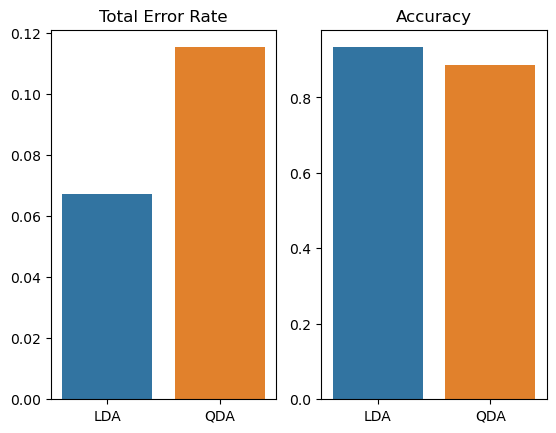

In [20]:
#Comparing Results between LDA and QDA

#TEST ERROR RATE OF LDA and QDA
x=["LDA","QDA"]
total_error=[test_error_lda,test_error_qda]
accuracy=[accuracy_score(y_test,y_pred_lda),accuracy_score(y_test,y_pred_qda)]

#Plot
plt.subplot(1,2,1)
ax = sns.barplot(x=x, y=total_error)
plt.title("Total Error Rate")

plt.subplot(1,2,2)
ax = sns.barplot(x=x, y=accuracy)
plt.title("Accuracy")

#saving
plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 4 (CAC 1)/lda_qda.png")

##### Interpretation: We see from the bar plots that the error of LDA is lesser compared to QDA. This means that LDA makes the lowest number of wrong predictions. The accuracy of LDA is simultaneosly more than QDA. Hence we can conclude that LDA model is on an overall better than QDA.


### 3. Naive Baeye's Method 

#### Introduction

Naive Bayes is the easiest and rapid classification method available, and it is well suited for dealing with enormous amounts of information. In several applications such as spam filtering, text classification, sentiment analysis, and recommender systems, the Naive Bayes classifier has shown to be effective. It makes predictions about unknown classes using the Bayes theory of probability.

#### Characteristics of Naive Bayes Classifier:

    1.The Naive Bayes method makes the assumption that the predictors contribute equally and independently to selecting the output class. 

    2. Although the Naive Bayes model’s assumption that all predictors are independent of one another is unfeasible in real-world circumstances, this assumption produces a satisfactory outcome in the majority of instances.

    3. Naive Bayes is often used for text categorization since the dimensionality of the data is frequently rather large.
    
#### Types of Naive Bayes Classifiers

    1. Gaussian Naive Bayes: This classifier is employed when the predictor values are continuous and are expected to follow a Gaussian distribution.
    2. Bernoulli Naive Bayes: When the predictors are boolean in nature and are supposed to follow the Bernoulli distribution, this classifier is utilized.
    3. Multinomial Naive Bayes: This classifier makes use of a multinomial distribution and is often used to solve issues involving document or text classification.

In [21]:
#Dataset
week

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


##### Note: We see that our predictors are having continous values hence we go with Gaussian Naive Baye's

In [23]:
#Defining Predictors and Response Varibale

X_n=week.drop(["Direction_Up"],axis=1)
y_n=week["Direction_Up"]

#To maximize the model’s efficiency, it’s always a good idea to normalize the data to a common scale.
X_n=(X_n-np.min(X_n))/(np.max(X_n)- np.min(X_n))

#Training and Testing Data
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.3, random_state = 1)


C:\Users\jesto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\jesto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


#### *Using Gausian Naive Baye's

In [27]:
from sklearn.naive_bayes import GaussianNB

#model
model_naive=GaussianNB().fit(X_train_n, y_train_n)

#prediction
y_pred_n = model_naive.predict(X_test_n)

#Error rate for Naive Bayes
test_error_naive= 1 - model_naive.score(X_test_n,y_test_n)

#Accuracy score for Naive Bayes
correct_rate_naive = 1 - test_error_naive
correct_rate_naive

#or

print(accuracy_score(y_test_n,y_pred_n))
print(test_error_naive)

0.9571865443425076
0.042813455657492394


##### Interpretations: Hence 95.71 % of the predictions are correct, with 42.8% error rate.

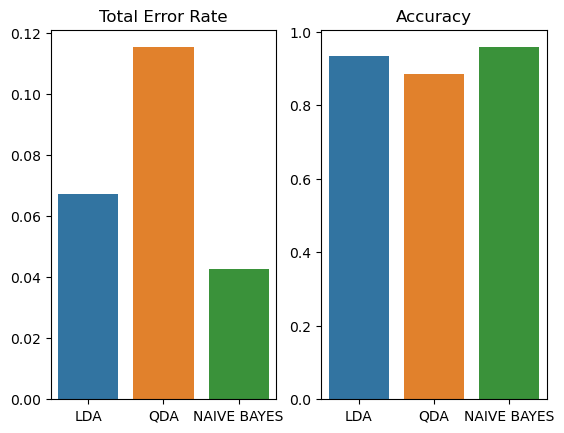

In [28]:
#Comparing Results between LDA ,QDA AND NAICE BAYES

#TEST ERROR RATE OF LDA and QDA
x=["LDA","QDA","NAIVE BAYES"]
total_error=[test_error_lda,test_error_qda,test_error_naive]
accuracy=[accuracy_score(y_test,y_pred_lda),accuracy_score(y_test,y_pred_qda),accuracy_score(y_test_n,y_pred_n)]

#Plot
plt.subplot(1,2,1)
ax = sns.barplot(x=x, y=total_error)
plt.title("Total Error Rate")

plt.subplot(1,2,2)
ax = sns.barplot(x=x, y=accuracy)
plt.title("Accuracy")

#saving
plt.savefig("D:/Machine Learning Practical/Lab Exercises/Lab 4 (CAC 1)/lda_qda_naive.png")

#### CONCLUSION:

We see from the bar plots that the error of Naive Baye's is much lesser compared to the other two methods. This means that Naive Baye's makes the lowest number of wrong predictions. The accuracy of Naive Baye's is more than the other two methods. Hence we can conclude and confirm that Naive Baye's model is on an overall better than the others for these particular predictors and response variables.
